In [3]:
## Importing Libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score,recall_score,f1_score,classification_report, confusion_matrix
from scipy.linalg import pinv
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.svm import SVC
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [4]:
df = pd.read_csv('data.tsv',sep='\t')

In [5]:
df.head()

,geneId,geneSymbol,DSI,DPI,diseaseId,diseaseName,diseaseType,diseaseClass,diseaseSemanticType,score,EI,YearInitial,YearFinal,NofPmids,NofSnps,source
0,1,A1BG,0.7,0.538,C0001418,Adenocarcinoma,group,C04,Neoplastic Process,0.01,1.0,2008.0,2008.0,1,0,LHGDN
1,1,A1BG,0.7,0.538,C0002736,Amyotrophic Lateral Sclerosis,disease,C18;C10,Disease or Syndrome,0.01,1.0,2008.0,2008.0,1,0,BEFREE
2,1,A1BG,0.7,0.538,C0003578,Apnea,phenotype,C23;C08,Sign or Symptom,0.01,1.0,2017.0,2017.0,1,0,BEFREE
3,1,A1BG,0.7,0.538,C0003864,Arthritis,disease,C05,Disease or Syndrome,0.01,1.0,2019.0,2019.0,1,0,BEFREE
4,1,A1BG,0.7,0.538,C0008373,Cholesteatoma,disease,C17,Disease or Syndrome,0.01,1.0,2020.0,2020.0,1,0,BEFREE


In [6]:
df['diseaseType'].unique()

array(['group', 'disease', 'phenotype'], dtype=object)

In [7]:
df['diseaseType'].value_counts()

diseaseType
disease      781622
phenotype    211293
group        142027
Name: count, dtype: int64

In [8]:
df.shape

(1134942, 16)

In [9]:
len(df.diseaseName.value_counts())

30170

In [11]:
df.isnull().sum()

geneId                      0
geneSymbol                  0
DSI                      2584
DPI                      2882
diseaseId                   0
diseaseName                 0
diseaseType                 0
diseaseClass           156403
diseaseSemanticType         0
score                       0
EI                     166974
YearInitial            166974
YearFinal              166974
NofPmids                    0
NofSnps                     0
source                      0
dtype: int64

In [12]:
## seperating Numerical Variables from the dataset.
num_var = df.select_dtypes(exclude='object')

In [13]:
num_var

,geneId,DSI,DPI,score,EI,YearInitial,YearFinal,NofPmids,NofSnps
0,1,0.700,0.538,0.01,1.0,2008.0,2008.0,1,0
1,1,0.700,0.538,0.01,1.0,2008.0,2008.0,1,0
2,1,0.700,0.538,0.01,1.0,2017.0,2017.0,1,0
3,1,0.700,0.538,0.01,1.0,2019.0,2019.0,1,0
4,1,0.700,0.538,0.01,1.0,2020.0,2020.0,1,0
...,...,...,...,...,...,...,...,...,...
1134937,115804232,NaN,NaN,0.10,1.0,2019.0,2019.0,1,0
1134938,115891964,0.861,0.077,0.01,1.0,2016.0,2016.0,1,0
1134939,115891964,0.861,0.077,0.01,1.0,2016.0,2016.0,1,0
1134940,115891964,0.861,0.077,0.01,1.0,2016.0,2016.0,1,0


In [14]:
df.DSI.median()

0.534

In [15]:
df.DSI.mean()

0.5416682056381463

In [16]:
df.describe()

,geneId,DSI,DPI,score,EI,YearInitial,YearFinal,NofPmids,NofSnps
count,1.134942e+06,1.132358e+06,1.132060e+06,1.134942e+06,967968.000000,967968.000000,967968.000000,1.134942e+06,1.134942e+06
mean,2.437042e+06,5.416682e-01,6.979658e-01,6.318843e-02,0.975242,2011.138019,2013.941110,2.632643e+00,2.407973e-01
std,1.553331e+07,1.300706e-01,2.029981e-01,9.900556e-02,0.136500,7.649745,6.370832,1.949824e+01,5.058252e+00
min,1.000000e+00,2.310000e-01,3.800000e-02,1.000000e-02,0.000000,1924.000000,1959.000000,0.000000e+00,0.000000e+00
25%,3.169000e+03,4.520000e-01,6.150000e-01,1.000000e-02,1.000000,2007.000000,2011.000000,1.000000e+00,0.000000e+00
50%,6.580000e+03,5.340000e-01,7.690000e-01,2.000000e-02,1.000000,2013.000000,2017.000000,1.000000e+00,0.000000e+00
75%,2.734200e+04,6.210000e-01,8.460000e-01,1.000000e-01,1.000000,2017.000000,2019.000000,2.000000e+00,0.000000e+00
max,1.158920e+08,1.000000e+00,9.620000e-01,1.000000e+00,1.000000,2020.000000,2020.000000,6.577000e+03,2.632000e+03


In [17]:
df.DPI.median()

0.769

In [18]:
df.DPI.mean()

0.6979657933325094

In [19]:
num_var.fillna(num_var.median(),inplace = True)

In [20]:
num_var.isnull().sum()

geneId         0
DSI            0
DPI            0
score          0
EI             0
YearInitial    0
YearFinal      0
NofPmids       0
NofSnps        0
dtype: int64

In [21]:
## Sepearting Categorical Variables from the dataset.
cat_var = df.select_dtypes(include='object')

In [22]:
cat_var.head()

,geneSymbol,diseaseId,diseaseName,diseaseType,diseaseClass,diseaseSemanticType,source
0,A1BG,C0001418,Adenocarcinoma,group,C04,Neoplastic Process,LHGDN
1,A1BG,C0002736,Amyotrophic Lateral Sclerosis,disease,C18;C10,Disease or Syndrome,BEFREE
2,A1BG,C0003578,Apnea,phenotype,C23;C08,Sign or Symptom,BEFREE
3,A1BG,C0003864,Arthritis,disease,C05,Disease or Syndrome,BEFREE
4,A1BG,C0008373,Cholesteatoma,disease,C17,Disease or Syndrome,BEFREE


In [23]:
cat_var.isnull().sum()

geneSymbol                  0
diseaseId                   0
diseaseName                 0
diseaseType                 0
diseaseClass           156403
diseaseSemanticType         0
source                      0
dtype: int64

In [24]:
df.diseaseClass.mode()

0    C04
Name: diseaseClass, dtype: object

In [25]:
## Handling missing categorical variuables
cat_var = cat_var.apply(lambda x: x.fillna(x.value_counts().index[0]))

In [26]:
cat_var.isnull().sum()

geneSymbol             0
diseaseId              0
diseaseName            0
diseaseType            0
diseaseClass           0
diseaseSemanticType    0
source                 0
dtype: int64

In [27]:
cat_var.head()

,geneSymbol,diseaseId,diseaseName,diseaseType,diseaseClass,diseaseSemanticType,source
0,A1BG,C0001418,Adenocarcinoma,group,C04,Neoplastic Process,LHGDN
1,A1BG,C0002736,Amyotrophic Lateral Sclerosis,disease,C18;C10,Disease or Syndrome,BEFREE
2,A1BG,C0003578,Apnea,phenotype,C23;C08,Sign or Symptom,BEFREE
3,A1BG,C0003864,Arthritis,disease,C05,Disease or Syndrome,BEFREE
4,A1BG,C0008373,Cholesteatoma,disease,C17,Disease or Syndrome,BEFREE


In [ ]:
    cat_var.geneSymbol.value_counts()

geneSymbol
TNF              2724
TP53             2494
IL6              2367
VEGFA            1899
IL1B             1801
                 ... 
DEFB108C            1
FBXO27              1
H2AP                1
DPRX                1
ZNF559-ZNF177       1
Name: count, Length: 21666, dtype: int64

In [29]:
cat_var.head(2)

,geneSymbol,diseaseId,diseaseName,diseaseType,diseaseClass,diseaseSemanticType,source
0,A1BG,C0001418,Adenocarcinoma,group,C04,Neoplastic Process,LHGDN
1,A1BG,C0002736,Amyotrophic Lateral Sclerosis,disease,C18;C10,Disease or Syndrome,BEFREE


In [ ]:
len(cat_var.diseaseName.value_counts())

30170

In [31]:
cat_var.diseaseType.value_counts()

diseaseType
disease      781622
phenotype    211293
group        142027
Name: count, dtype: int64

In [32]:
len(cat_var.diseaseSemanticType.value_counts())

33

In [33]:
cat_var.source.value_counts()

source
BEFREE                                        789377
HPO                                           148643
CTD_human                                      44786
GWASCAT                                        34270
CLINVAR                                        14326
                                               ...  
BEFREE;CLINGEN;CLINVAR;MGD                         1
CGI;GENOMICS_ENGLAND;LHGDN                         1
BEFREE;CLINGEN;CLINVAR;HPO                         1
BEFREE;CGI;CLINVAR;CTD_human;HPO;LHGDN;RGD         1
BEFREE;CLINGEN;LHGDN;ORPHANET                      1
Name: count, Length: 878, dtype: int64

In [34]:
cat_var.diseaseClass.value_counts()

diseaseClass
C04                                        289130
C06;C04                                     50706
C14                                         33452
C23                                         32747
C23;C10                                     28039
                                            ...  
C23;C16;C17;C10;C19;F03;F01                     1
C16;C13;C05;C10                                 1
C04;C05;C20;C15;C14                             1
C16;C05;C08                                     1
C23;C16;C18;C13;C11;C05;C10;C19;F03;F01         1
Name: count, Length: 1106, dtype: int64

In [35]:
le = LabelEncoder()
cat_var1 = cat_var.apply(le.fit_transform)

In [36]:
cat_var.head(3)

,geneSymbol,diseaseId,diseaseName,diseaseType,diseaseClass,diseaseSemanticType,source
0,A1BG,C0001418,Adenocarcinoma,group,C04,Neoplastic Process,LHGDN
1,A1BG,C0002736,Amyotrophic Lateral Sclerosis,disease,C18;C10,Disease or Syndrome,BEFREE
2,A1BG,C0003578,Apnea,phenotype,C23;C08,Sign or Symptom,BEFREE


In [ ]:
cat_var1.head(3)

,geneSymbol,diseaseId,diseaseName,diseaseType,diseaseClass,diseaseSemanticType,source
0,0,52,1855,1,49,23,859
1,0,134,2533,0,613,11,0
2,0,222,3074,2,740,30,0


In [38]:
## 0 == disease
## 1 == group
## 2 == Phenotype
# cat_var.diseaseType.value_counts()
# cat_var1['diseaseType'] = df.diseaseType
cat_var1.head()

,geneSymbol,diseaseId,diseaseName,diseaseType,diseaseClass,diseaseSemanticType,source
0,0,52,1855,1,49,23,859
1,0,134,2533,0,613,11,0
2,0,222,3074,2,740,30,0
3,0,244,3209,0,127,11,0
4,0,565,6371,0,572,11,0


In [39]:
## Merging Categorical and numerical variables after Data Preprocessing.

data = pd.concat([num_var,cat_var1],axis = 1)


In [40]:
data.head()

,geneId,DSI,DPI,score,EI,YearInitial,YearFinal,NofPmids,NofSnps,geneSymbol,diseaseId,diseaseName,diseaseType,diseaseClass,diseaseSemanticType,source
0,1,0.7,0.538,0.01,1.0,2008.0,2008.0,1,0,0,52,1855,1,49,23,859
1,1,0.7,0.538,0.01,1.0,2008.0,2008.0,1,0,0,134,2533,0,613,11,0
2,1,0.7,0.538,0.01,1.0,2017.0,2017.0,1,0,0,222,3074,2,740,30,0
3,1,0.7,0.538,0.01,1.0,2019.0,2019.0,1,0,0,244,3209,0,127,11,0
4,1,0.7,0.538,0.01,1.0,2020.0,2020.0,1,0,0,565,6371,0,572,11,0


In [41]:
data[data['diseaseType']==2]

,geneId,DSI,DPI,score,EI,YearInitial,YearFinal,NofPmids,NofSnps,geneSymbol,diseaseId,diseaseName,diseaseType,diseaseClass,diseaseSemanticType,source
2,1,0.700,0.538,0.01,1.0,2017.0,2017.0,1,0,0,222,3074,2,740,30,0
8,1,0.700,0.538,0.01,1.0,2017.0,2017.0,1,0,0,1016,10752,2,572,30,0
9,1,0.700,0.538,0.01,1.0,2018.0,2018.0,1,0,0,1099,29976,2,654,2,0
11,1,0.700,0.538,0.30,1.0,2017.0,2017.0,1,0,0,1368,13314,2,716,15,762
55,2,0.529,0.769,0.20,1.0,1988.0,1988.0,1,0,3,1080,11387,2,654,30,876
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1134889,115482723,0.506,0.846,0.01,1.0,2017.0,2017.0,1,0,7178,12422,10329,2,49,11,0
1134895,115482723,0.506,0.846,0.07,1.0,2008.0,2018.0,7,0,7178,13468,28471,2,49,23,0
1134908,115482723,0.506,0.846,0.01,1.0,2016.0,2016.0,1,0,7178,15147,18117,2,49,23,0
1134923,115482723,0.506,0.846,0.01,1.0,2004.0,2004.0,1,0,7178,22616,23366,2,654,30,0


In [42]:
data.shape

(1134942, 16)

In [43]:
data.isnull().sum()

geneId                 0
DSI                    0
DPI                    0
score                  0
EI                     0
YearInitial            0
YearFinal              0
NofPmids               0
NofSnps                0
geneSymbol             0
diseaseId              0
diseaseName            0
diseaseType            0
diseaseClass           0
diseaseSemanticType    0
source                 0
dtype: int64

In [44]:
X = data.drop(['diseaseType','NofSnps','EI'],axis = 1)
X.head()

,geneId,DSI,DPI,score,YearInitial,YearFinal,NofPmids,geneSymbol,diseaseId,diseaseName,diseaseClass,diseaseSemanticType,source
0,1,0.7,0.538,0.01,2008.0,2008.0,1,0,52,1855,49,23,859
1,1,0.7,0.538,0.01,2008.0,2008.0,1,0,134,2533,613,11,0
2,1,0.7,0.538,0.01,2017.0,2017.0,1,0,222,3074,740,30,0
3,1,0.7,0.538,0.01,2019.0,2019.0,1,0,244,3209,127,11,0
4,1,0.7,0.538,0.01,2020.0,2020.0,1,0,565,6371,572,11,0


In [45]:
y = data.diseaseType

In [46]:
from imblearn.over_sampling import SMOTE 
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, y)

In [ ]:
X_res.shape, y_res.shape

((2344866, 13), (2344866,))

In [48]:
## Splitting the dataset into Training and Testing foir further use.
x_train,x_test,y_train,y_test = train_test_split(X_res,y_res,test_size = 0.3,random_state = 23)

### Random Forest Classifier


In [ ]:

from sklearn.ensemble import RandomForestClassifier

# Random Forest with optimized parameters
rf_model = RandomForestClassifier(
    n_estimators=500,           # Increased number of trees
    max_depth=15,               # Limits tree depth to prevent overfitting
    max_features='log2',        # Uses log2 number of features per split
    bootstrap=True,             # Sampling with replacement
    min_samples_leaf=3,         # Ensures leaves contain at least 3 samples
    min_samples_split=5,        # Requires at least 5 samples to split a node
    random_state=42,            # Reproducibility
    n_jobs=-1                   # Utilizes all CPU cores for faster training
)

# Training the model
rf_model.fit(x_train, y_train)

# Making predictions
rf_preds = rf_model.predict(x_test)

rf_model.predict(x_test)
X[:3]
rf_model.score(x_test,y_test)
accuracy_score(y_test,rf_preds)
cm = confusion_matrix(y_test,rf_preds)
cm

In [ ]:
clsr= classification_report(y_test,rf_preds)
print(clsr)

              precision    recall  f1-score   support

           0       0.98      1.00      0.99    234073
           1       0.99      0.98      0.99    234548
           2       0.99      0.99      0.99    234839

    accuracy                           0.99    703460
   macro avg       0.99      0.99      0.99    703460
weighted avg       0.99      0.99      0.99    703460



In [ ]:
import joblib
joblib.dump(rf_model, 'random_forest_model.joblib')

['random_forest_model.joblib']

<Axes: >

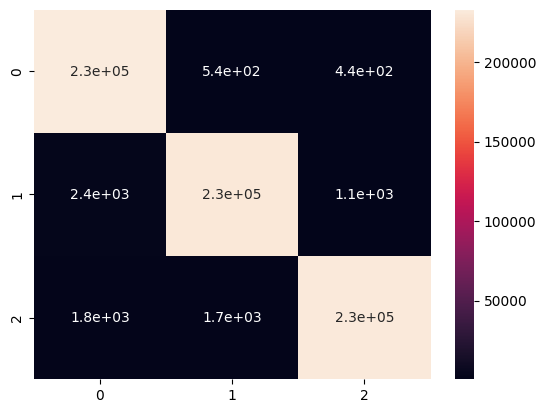

In [60]:
sns.heatmap(cm, annot=True)

In [ ]:
precision_score(y_test,rf_preds,average = 'weighted')
recall_score(y_test,rf_preds,average = 'micro')
f1_score(y_test,rf_preds,average ='weighted')
fpr,tpr,t = roc_curve(y_true = y_test,y_score = rf_preds,pos_label =2)

0.9887334524022618

In [65]:
print(fpr,tpr,t)

[0.         0.00334812 0.4974489  1.        ] [0.         0.98542406 0.9924544  1.        ] [inf  2.  1.  0.]


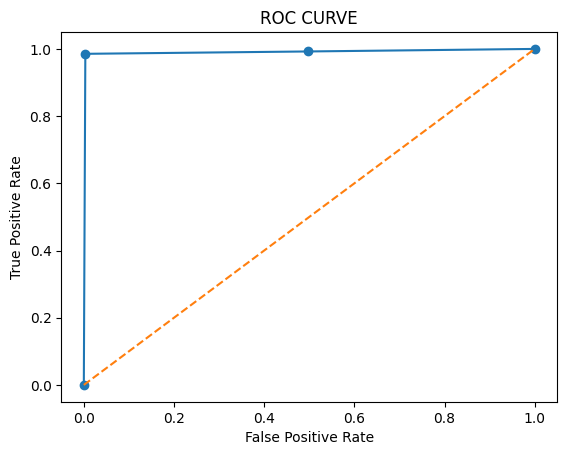

In [66]:
plt.plot(fpr,tpr)
plt.plot([0,1],[0,1],'--')
plt.scatter(fpr,tpr)
plt.title('ROC CURVE')
plt.xlabel('False Positive Rate',color = 'black')
plt.ylabel('True Positive Rate',color = 'black')
plt.show()

In [67]:
model.feature_importances_

array([0.01583872, 0.01655051, 0.02827617, 0.0805435 , 0.03242174,
       0.03306467, 0.05055511, 0.0129595 , 0.19885574, 0.16531994,
       0.15158091, 0.13861291, 0.07542058])

In [68]:
fi = pd.DataFrame(model.feature_importances_, index= x_train.columns,columns=['importance']).sort_values('importance',ascending=False)

In [69]:
feature_importances = pd.DataFrame(model.feature_importances_, index =x_train.columns,  columns=['importance']).sort_values('importance', ascending=False)

In [70]:
fi

,importance
diseaseId,0.198856
diseaseName,0.165320
diseaseClass,0.151581
diseaseSemanticType,0.138613
score,0.080543
source,0.075421
NofPmids,0.050555
YearFinal,0.033065
YearInitial,0.032422
DPI,0.028276


In [71]:
accuracy_score(y_test,pred)

0.9886887669519233

<Axes: >

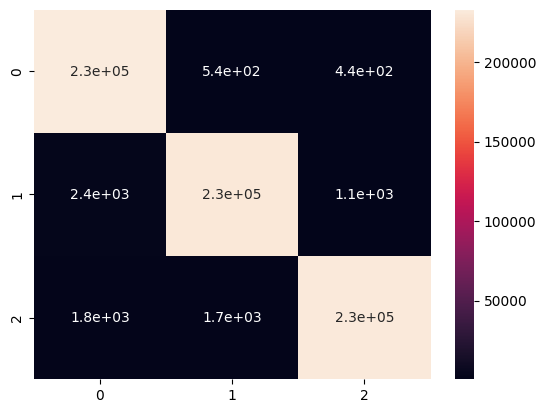

In [72]:
sns.heatmap(confusion_matrix(y_test,pred),annot= True)

In [73]:
# type(x_train),type(y_train)

In [74]:
# (x_train[0][1])

### Extreme Gradient Boosting (XGBoost) Classifier

In [ ]:
from xgboost import XGBClassifier

# XGBoost with optimized parameters
xgb_model = XGBClassifier(
    n_estimators=500,           # More boosting rounds
    learning_rate=0.05,         # Slower learning for better convergence
    max_depth=6,                # Restricts tree growth
    subsample=0.7,              # Uses 70% of data for each boosting round
    colsample_bytree=0.7,       # Uses 70% of features for each tree
    gamma=2,                    # Minimum loss reduction required to make a split
    reg_alpha=0.05,             # L1 regularization to reduce model complexity
    reg_lambda=5,               # L2 regularization to prevent overfitting
    early_stopping_rounds=50,   # Stops training if no improvement for 50 rounds
    eval_metric='logloss',      # Optimizes log loss for classification
    use_label_encoder=False,    # Avoids unnecessary warnings
    random_state=42
)

# Training with early stopping
xgb_model.fit(X_train, y_train, eval_set=[(X_valid, y_valid)], verbose=False)

# Making predictions
xgb_preds = xgb_model.predict(X_test)

accuracy_score(y_test,xgb_preds)
precision_score(y_test,xgb_preds,average = 'macro')
recall_score(y_test,xgb_preds,average = 'weighted')
f1_score(y_test,xgb_preds,average='micro')

In [ ]:
clsr= classification_report(y_test,xgb_preds)
print(clsr)

              precision    recall  f1-score   support

         0.0       0.95      0.99      0.97    234073
         1.0       0.98      0.95      0.97    234548
         2.0       0.98      0.97      0.97    234839

    accuracy                           0.97    703460
   macro avg       0.97      0.97      0.97    703460
weighted avg       0.97      0.97      0.97    703460



<Axes: >

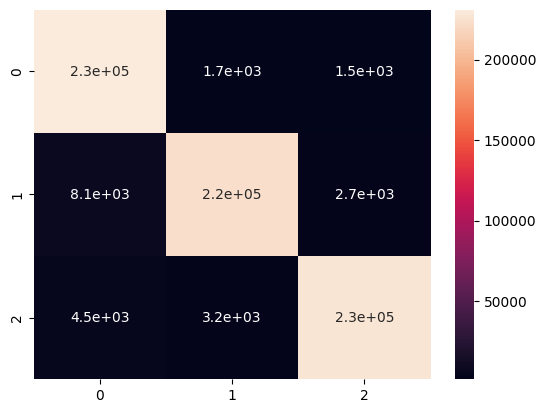

In [ ]:
sns.heatmap(confusion_matrix(y_test,xgb_preds),annot = True)

In [ ]:
fpr,tpr,t = roc_curve(y_true = y_test,y_score = xgb_preds,pos_label =2)

In [85]:
print(fpr,tpr,t)

[0.         0.00892832 0.48999725 1.        ] [0.         0.96747985 0.98099123 1.        ] [inf  2.  1.  0.]


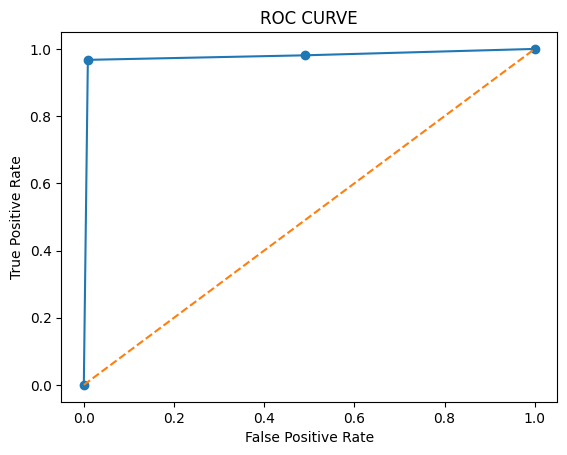

In [86]:
plt.plot(fpr,tpr)
plt.plot([0,1],[0,1],'--')
plt.scatter(fpr,tpr)
plt.title('ROC CURVE')
plt.xlabel('False Positive Rate',color = 'black')
plt.ylabel('True Positive Rate',color = 'black')
plt.show()

In [ ]:
roc_auc_score(y_test,pred_probs,multi_class = 'ovo')

### Light Gradient Boosting Machine

In [91]:
import lightgbm as lgb

In [92]:
lgb1 = lgb.LGBMClassifier()

In [93]:
model2 = lgb1.fit(x_train,y_train)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.111398 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3050
[LightGBM] [Info] Number of data points in the train set: 1641406, number of used features: 13
[LightGBM] [Info] Start training from score -1.097857
[LightGBM] [Info] Start training from score -1.098724
[LightGBM] [Info] Start training from score -1.099256


In [94]:
pred2 = model2.predict(x_test)

In [95]:
print(classification_report(y_test,pred2))

              precision    recall  f1-score   support

           0       0.92      0.99      0.95    234073
           1       0.97      0.93      0.95    234548
           2       0.97      0.95      0.96    234839

    accuracy                           0.95    703460
   macro avg       0.96      0.95      0.95    703460
weighted avg       0.96      0.95      0.95    703460



In [96]:
accuracy_score(y_test,pred2)

0.9539405225599181

In [97]:
precision_score(y_test,pred2,average = 'macro')

0.9552194828721379

In [98]:
recall_score(y_test,pred2,average = 'weighted')

0.9539405225599181

In [99]:
confusion_matrix(y_test,pred2)

array([[230656,   1442,   1975],
       [ 13410, 217236,   3902],
       [  6978,   4694, 223167]])

<Axes: >

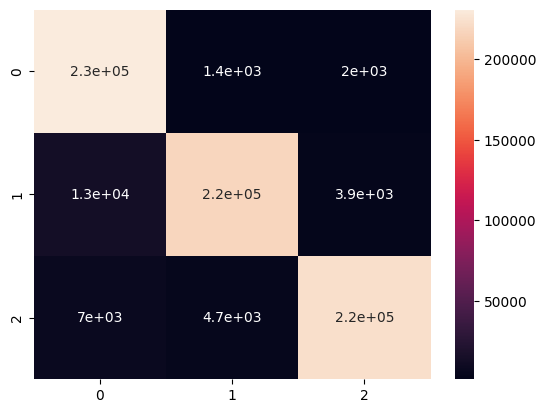

In [100]:
sns.heatmap(confusion_matrix(y_test,pred2),annot = True)

[0.         0.01254105 0.47918254 1.        ] [0.         0.95029786 0.97028603 1.        ] [inf  2.  1.  0.]


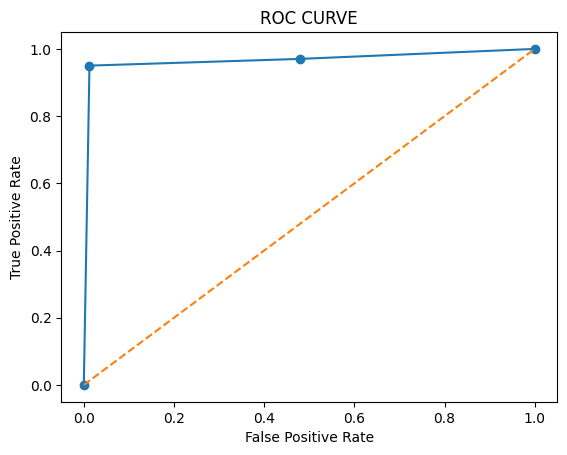

In [101]:
fpr,tpr,t = roc_curve(y_true = y_test,y_score = pred2,pos_label =2)

print(fpr,tpr,t)

plt.plot(fpr,tpr)
plt.plot([0,1],[0,1],'--')
plt.scatter(fpr,tpr)
plt.title('ROC CURVE')
plt.xlabel('False Positive Rate',color = 'black')
plt.ylabel('True Positive Rate',color = 'black')
plt.show()

### K Nearest Neighbors

In [102]:
from sklearn.neighbors import KNeighborsClassifier

In [103]:
model3 = KNeighborsClassifier()

In [104]:
model3.fit(x_train,y_train)

KNeighborsClassifier()

In [105]:
pred3 = model3.predict(x_test)

In [106]:
accuracy_score(y_test,pred3)

0.8765658317459415

In [107]:
model3.score(x_train,y_train)

0.9184108014714214

In [108]:
precision_score(y_test,pred3,average = 'macro')

0.8789721104198472

In [109]:
recall_score(y_test,pred3,average = 'micro')

0.8765658317459415

In [110]:
f1_score(y_test,pred3,average = 'weighted')

0.8740646336373925

In [111]:
print(classification_report(y_test,pred3))

              precision    recall  f1-score   support

           0       0.90      0.75      0.82    234073
           1       0.86      0.95      0.90    234548
           2       0.88      0.93      0.90    234839

    accuracy                           0.88    703460
   macro avg       0.88      0.88      0.87    703460
weighted avg       0.88      0.88      0.87    703460



In [112]:
confusion_matrix(y_test,pred3)

array([[174385,  31562,  28126],
       [  8502, 223391,   2655],
       [  9973,   6013, 218853]])

<Axes: >

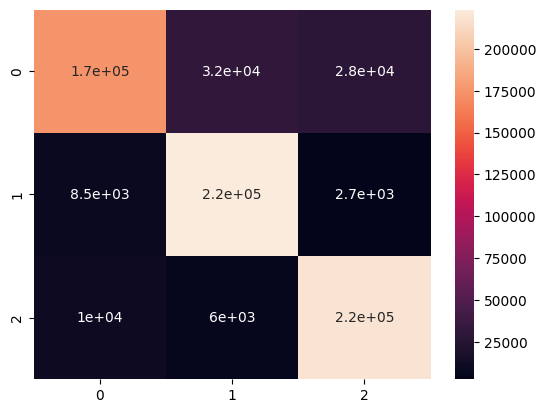

In [113]:
sns.heatmap(confusion_matrix(y_test,pred3),annot = True)

[0.         0.06568421 0.60973367 1.        ] [0.         0.93192783 0.95753261 1.        ] [inf  2.  1.  0.]


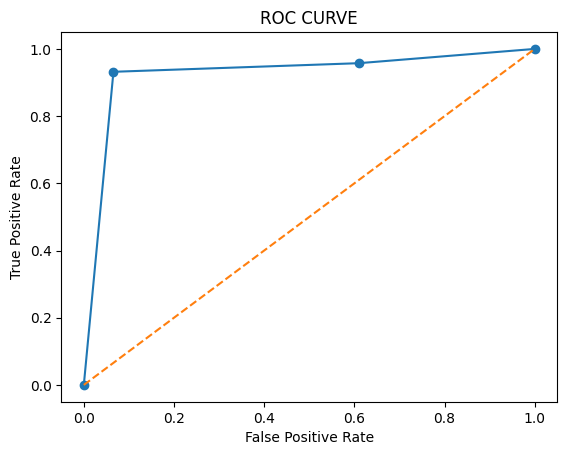

In [114]:
fpr,tpr,t = roc_curve(y_true = y_test,y_score = pred3,pos_label =2)

print(fpr,tpr,t)

plt.plot(fpr,tpr)
plt.plot([0,1],[0,1],'--')
plt.scatter(fpr,tpr)
plt.title('ROC CURVE')
plt.xlabel('False Positive Rate',color = 'black')
plt.ylabel('True Positive Rate',color = 'black')
plt.show()

### Support Vector machines

In [115]:
model4 = SVC()

In [116]:
model4.fit(x_train[:10000],y_train[:10000])


SVC()

In [117]:
pred4 = model4.predict(x_test)

In [118]:
accuracy_score(y_test,pred4)

0.33450516020811416

In [119]:
precision_score(y_test,pred4,average = 'micro')

0.33450516020811416

In [120]:
recall_score(y_test,pred4,average = 'micro')

0.33450516020811416

In [121]:
f1_score(y_test,pred4,average = 'weighted')

0.1810049092363622

<Axes: >

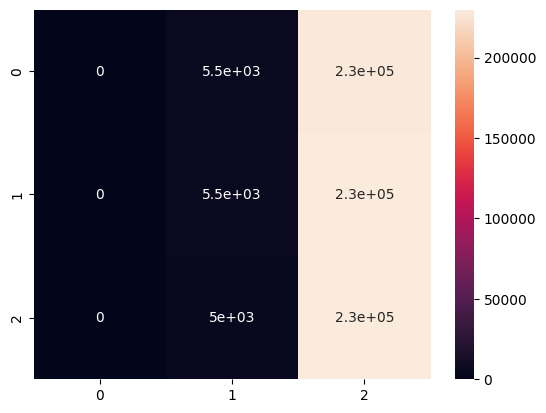

In [122]:
sns.heatmap(confusion_matrix(y_test,pred4),annot = True)

[0.         0.97661863 1.        ] [0.         0.97858107 1.        ] [inf  2.  1.]


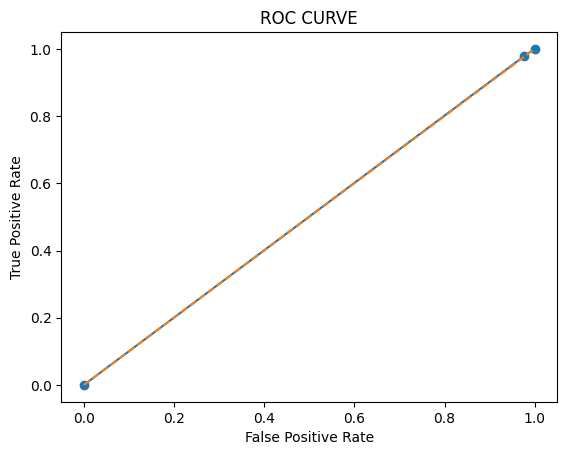

In [123]:
fpr,tpr,t = roc_curve(y_true = y_test,y_score = pred4,pos_label =2)

print(fpr,tpr,t)

plt.plot(fpr,tpr)
plt.plot([0,1],[0,1],'--')
plt.scatter(fpr,tpr)
plt.title('ROC CURVE')
plt.xlabel('False Positive Rate',color = 'black')
plt.ylabel('True Positive Rate',color = 'black')
plt.show()

In [126]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import tensorflow as tf

In [127]:
x_train = tf.convert_to_tensor(x_train, dtype=tf.float32)
y_train = tf.convert_to_tensor(y_train, dtype=tf.float32)
x_test = tf.convert_to_tensor(x_test, dtype=tf.float32)
y_test = tf.convert_to_tensor(y_test, dtype=tf.float32)
model = Sequential()
model.add(Dense(30, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(1, activation='softmax'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy']) 

In [128]:
model.fit(x_train[:5000], y_train[:5000], batch_size=50, epochs=150, validation_data=(x_test, y_test))

Epoch 1/150


c:\Users\asus\.conda\envs\myenv\lib\site-packages\keras\src\ops\nn.py:907: UserWarning: You are using a softmax over axis -1 of a tensor of shape (50, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


 71/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3338 - loss: 22940.7324

c:\Users\asus\.conda\envs\myenv\lib\site-packages\keras\src\ops\nn.py:907: UserWarning: You are using a softmax over axis -1 of a tensor of shape (None, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


100/100 ━━━━━━━━━━━━━━━━━━━━ 17s 152ms/step - accuracy: 0.3341 - loss: 14977.4443 - val_accuracy: 0.3334 - val_loss: 9055.3896
Epoch 2/150
100/100 ━━━━━━━━━━━━━━━━━━━━ 16s 157ms/step - accuracy: 0.3443 - loss: -8539.8975 - val_accuracy: 0.3334 - val_loss: 13323.9580
Epoch 3/150
100/100 ━━━━━━━━━━━━━━━━━━━━ 18s 182ms/step - accuracy: 0.3388 - loss: -38498.8086 - val_accuracy: 0.3334 - val_loss: 15105.7510
Epoch 4/150
100/100 ━━━━━━━━━━━━━━━━━━━━ 14s 137ms/step - accuracy: 0.3231 - loss: 20966.5762 - val_accuracy: 0.3334 - val_loss: 14250.9170
Epoch 5/150
100/100 ━━━━━━━━━━━━━━━━━━━━ 13s 135ms/step - accuracy: 0.3351 - loss: -55688.5898 - val_accuracy: 0.3334 - val_loss: 14840.1055
Epoch 6/150
100/100 ━━━━━━━━━━━━━━━━━━━━ 14s 138ms/step - accuracy: 0.3337 - loss: -83610.5547 - val_accuracy: 0.3334 - val_loss: 18706.6934
Epoch 7/150
100/100 ━━━━━━━━━━━━━━━━━━━━ 13s 135ms/step - accuracy: 0.3308 - loss: -8618.7324 - val_accuracy: 0.3334 - val_loss: 16108.0010
Epoch 8/150
100/100 ━━━━━━━━━━

KeyboardInterrupt: 

In [137]:
model.save('ANN.h5')

### Predictions

In [138]:
ex = [[1,0.7,0.538,0.01,2008.0,2008.0,1,0,52,1855,49,23,85]]

In [139]:
model.predict(ex)

ValueError: Unrecognized data type: x=[[1, 0.7, 0.538, 0.01, 2008.0, 2008.0, 1, 0, 52, 1855, 49, 23, 85]] (of type <class 'list'>)

In [ ]:
val = pd.DataFrame(ex,columns= X.columns)
val

In [ ]:
model1.predict(val)

In [ ]:
model2.predict(ex)

In [ ]:
ex1 = [[1,0.7,0.538,0.01,2008.0,2008.0,1,0,52,1855,49,3,859]]

In [ ]:
model2.predict(ex1)

In [ ]:
val1 = pd.DataFrame(ex,columns = X.columns)

In [ ]:
model1.predict(val1)

In [ ]:
model.predict(ex1)

In [ ]:
x_test[10:20]

In [ ]:
y_test[10:20]

In [ ]:
p = [[6524,0.499,0.769,0.01,2018.0,2018.0,1,17605,464,20458,73,23,0]]

In [ ]:
model.predict(p)

In [ ]:
p1 = [[4038,0.568,0.692,0.10,2013.0,2017.0,0,10315,5467,27685,49,15,850]]

In [ ]:
model.predict(p1)

In [ ]:
p3 = [[6558,0.552,0.808,0.03,2010.0,2019.0,3,17303,2898,6027,212,11,0]]

In [ ]:
model.predict(p3)